  

> #### Krithika Devi Chandran (2211570)
> #### *Cohort:* CDB22DW022, AI & ML



This notebook will walk through the basic steps of building two toy models for classifying handwritten numbers.
* The first model will be a basic fully-connected neural network.
* The second model will be a deeper network that introduces the concepts of convolution and pooling.

# Task for AI

Our goal is to construct and train an artificial nerual network on thousands of images of handwritten digits so that it may successfully identify others when presented. 

The data that will be incorporated is the **MNIST database** which contains **60,000 images for training** and **10,000 test images**. We will use the `Keras Python API` with `TensorFlow` as the backend.

# Prerequisite Python Modules

some software needs to be loaded into the Python environment.

In [ ]:
import numpy as np                    # advanced math library
import matplotlib.pyplot as plt       # MATLAB like plotting routines
import random                         # for generating random numbers
%matplotlib inline

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type is used to create models layer-by-layer

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # Numpy related tool in Keras API utilities

In [ ]:
# This code below gives all outputs in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Loading Training Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [ ]:
# The MNIST data is split between 60,000 images (28 x 28 px)
# 60,000 training images and 10,000 testing images (28 x 28 px)z
(X_train, y_train), (X_test, y_test) =  mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Using matplotlib, we can plot some sample images from the training set directly into this Jupyter Notebook.

Text(0.5, 1.0, 'Class 1')

Text(0.5, 1.0, 'Class 5')

Text(0.5, 1.0, 'Class 7')

Text(0.5, 1.0, 'Class 4')

Text(0.5, 1.0, 'Class 5')

Text(0.5, 1.0, 'Class 6')

Text(0.5, 1.0, 'Class 6')

Text(0.5, 1.0, 'Class 0')

Text(0.5, 1.0, 'Class 3')

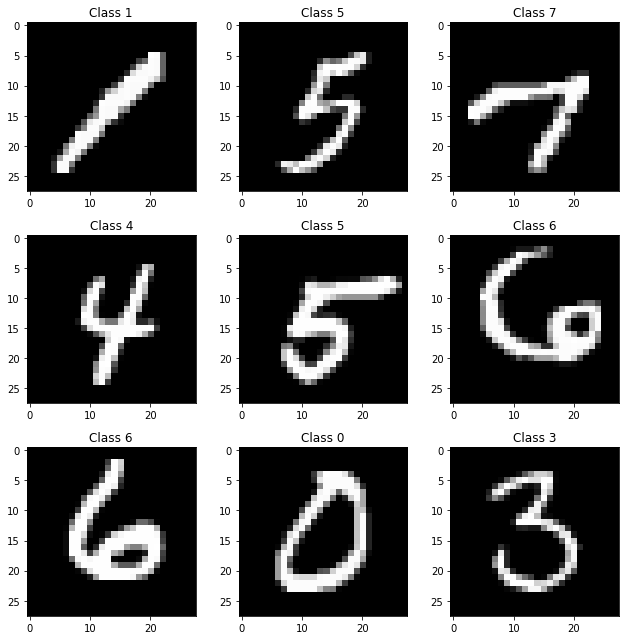

In [ ]:
plt.rcParams['figure.figsize'] = (9,9)  # Make the figures a bit bigger

for i in range(9): # in order to get first nine images
  plt.subplot(3,3,i+1) # sub plotting with 3 rows, 3 columns and third argument represents the index of the plot
  num = random.randint(0, len(X_train)) # randomly selecting 9 images from 60,000 training images
  plt.imshow(X_train[num], cmap='gray', interpolation='none') # getting those 9 images from X_train as gray colormap
  # For the Agg(raster graphics -- high quality images using the Anti-Grain Geometry engine), 
  # ps(vector graphics -- Portable Document Format output), and 
  # pdf(vector graphics -- PostScript output) backends, interpolation = 'none' works well when a big image is scaled down
  plt.title("Class {}".format(y_train[num])) 

plt.tight_layout()

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

Fun-fact! Your computer screen has three channels for each pixel: red, green, blue. Each of these channels also likely takes an 8-bit integer. 3 channels-- 24 bits total -- 16,777,216 possible colors!

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        7U8I9O09I8
matprint(X_train[num])

0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0   17   87  147  208  208  186    5    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   0    0    8   89  172  239  254  226  226  254  254    7    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   0   52  186  254  230  142   31   12   33  254  214    3    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  31  224  254  133   10    0    0    0   21  238  177    3    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  57  138   80   10    0    0    0    0  113  254   49    0    0

## Formatting the input data layer 
Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

    Pooled Feature Map --> Flattened vector

In [ ]:
X_train = X_train.reshape(60000, 784)   # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)     # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.


To make computation easier and faster, reducing this pixel values by normalizing it to range from 0 to 1 which is achieved by dividing all the values by 255, since apart from 0 the range is 255.

In [ ]:
# to normalize, first converting pixel values to float type
X_train = X_train.astype('float32')     # Change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /=255   # normalize each value for each pixel for the entire vector for each input
X_test /=255


Printing training and testing shape

In [ ]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


## One-hot encoding

`np_utils.to_categorical` is used to convert a class vector (integers) to binary class matrix.

The Keras API provides a `to_categorical()` method that can be used to **one-hot encode** *integer* data.

The number of classes can be passed to the method as the `nb_classes` parameter, which represents all the possible values of the classes.

> Why we need to do the encoding for labels?

Encoding categorical labels is a process of converting categorical label into integer format **so that the data with converted categorical values can be provided to the models to give and improve the predictions**.

In [ ]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
y_train
print("\n",y_train[2])   # before encoding labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)


 4


In [ ]:
Y_train[2]  # after encoding labels

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Building Multi-layer Perceptron (MLP) Model

The `Sequential` model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

In [ ]:
# The Sequential model is a linear stack of layers and is very common.

model_1 = Sequential()

### The first hidden layer

In this first layer, 
* 512 neurons is added with 784 input shape that was created.
* `Relu`activation function is added into this layer.
> An activation function is a function that is added into an artificial neural network in order to help the network learn complex patterns in the data. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.

    > This means that the neurons will only be deactivated if the output of the linear transformation is less than 0. That is, If you look at the ReLU function if the input is negative it will convert it to zero and the neuron does not get activated.

* Using 20% (0.2) Dropout, inorder to prevent overfitting. 
> It turns off the contribution of randomly selected 20% neurons which sets input units to 0 that is ignored during training.







In [ ]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.

model_1.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

In [ ]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model_1.add(Activation('relu'))

In [ ]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "Overfitting" the training data.
# this randomly turning off some of the neurons so that learning won't get memorized.
model_1.add(Dropout(0.2))   # normal Dropout range be 0.1 to 0.5

### The second hidden layer

In this second layer,

* 512 neurons is added from output of first 512-neuron layer.
* `Relu` activation function is added.
* `20% Dropout` is added.

In [ ]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.2))

### The Final Output layer

In this final layer,
* `10 neurons` is added, since we're having 10 category of numbers from `0 - 9`.
* `softmax` activation function is added.
> The softmax function handles multi-class classificatin problems, which is also a type of sigmoid function that helps to handle binary classification. **Softmax is very useful to predict the probabilities of each classes.**




In [ ]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).

model_1.add(Dense(10))

In [ ]:
# The "softmax" activation represents a probability distribution
# over K different possible outcomes.
# Its values are all non-negative and sum to 1.
model_1.add(Activation('softmax'))

## Summary of the MLP model


In [ ]:
# Summarize the built model

model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 activation_24 (Activation)  (None, 512)               0         
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 activation_25 (Activation)  (None, 512)               0         
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 10)               

## Total params, Trainable params & Non-trainable params.

> What are trainable parameters and non-trainable parameters in this summary?

For model summary, we can see at the bottom of summary there are 3 parameters.
* ***Total params***

 **Total params** is the sum of **Trainable params** and **Non-trainable params**

* ***Trainable params***

 Trainable parameters are those which value is adjusted/modified during training as per their gradient.
 
 **Note: Weights and Bias are the trainable parameters**

* ***Non-trainable params***

  Non trainable parameters are those which value is not optimized during the training as per their gradient.

Mathematical Calculation for **first dense layer** parameters:

> * Input layer has **784 features**.
> * First hidden layer has **512 nodes (512 neurons).**
> * **Weight** Matrix for input layer and first hidden layer has dimension = **784 x 512** 
> * Number of **trainable weights** for the first layer  = **401408**
> * Number of **bias** for first hidden layer = Number of Nodes in first hidden layer = **512**
> * **Total Trainable parameters for first dense layer = 401408 + 512 = 401920**


Mathematical Calculation for **second dense layer** parameters:

> * Number of **input nodes** for second hidden layer = Number of nodes in first hidden layer = **512**
> * Number of **nodes** in second hidden layer = 512
> * **Weight** matrix dimension = **Number of nodes in first hidden layer * Number of nodes in second hidden layer = 512 * 512 = 262144**
> * Number of **bias** = Number of nodes in the second hidden layer = **512**
> * **Total Trainable parameters for second dense layer = 262144 + 512 = 262656**

Mathematical Calculation for **third (final output) dense layer** parameters:

> * Number of **input nodes** for final hidden layer = Number of nodes in second hidden layer = **512**
> * Number of **nodes** in this final output layer = **10**
> * Number of **weights** for this layer = **512*10 = 5120**
> * Number of **bias** for this layer = Number of nodes in the this layer = **10**
> * **Total Trainable parameters for this final output layer = 5120 + 10 = 5130** 

**Non-trainable parameters does not exist in this model since every input is optimized.** Therefore, 
      
      Total parameters = Trainable parameters + Non-trainable parameters = (401920 + 262656 + 5130) + 0 = 669706

## Compiling the model

Keras is built on top of Theano and TensorFlow. Both packages allow you to define a computation graph in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called categorical cross-entropy, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [https://en.wikipedia.org/wiki/Cross_entropy]

The optimizer helps determine how quickly the model learns through **gradient descent**. The rate at which descends a gradient is called the **learning rate**.

So are smaller learning rates better? Not quite! It's important for an optimizer not to get stuck in local minima while neglecting the global minimum of the loss function. Sometimes that means trying a larger learning rate to jump out of a local minimum.

Before fitting, the model has to be compiled. The difference between the actual output and desired output is calculated using the **loss function**, and the **optimizer function** directs how the weights should be adjusted.

When compiled for training, the model is given:

* **Loss function** - (to measure error) A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss")

[ https://peltarion.com/knowledge-center/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy ]

The below model is compiled by `categorical_crossentropy` losses which is used in multi-class classification tasks. The model uses the categorical crossentropy to learn to give a high probability to the correct digit and a low probability to the other digits.

Since **softmax** activation function is used, it is only recommended to use the **categorical_crossentropy** loss function.

* **Optimizer function** - A way of adjusting internal values in order to reduce the loss.

The below model is compiled by `Adam` Optimization which is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

**Learning Rate** used here for Adam Optimizer is `0.001 (default)` which determines how fast or slow we will move towards the optimal weights.

    *  If the learning rate is very large we will skip the optimal solution. 

    * If the learning rate is too small we will need too many iterations to converge to the best values.


* **Metrics** -  `accuracy` metrics is used here.

In [ ]:
# Let's use the Adam optimizer for learning
model_1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', metrics=['accuracy'])

## Train the first model!

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!

Train the model by calling the `fit` method.

The cycle of calculate, compare, adjust is controlled by the `fit` method. 

* The first argument is the *inputs*, the second argument is the desired *outputs*. 
* The `batch_size` argument defines the number of samples we use in one epoch to train a neural network. The batch size is `256`
  > Batch size is one of the most important hyperparameters to tune in modern deep learning systems. Choosing batch as 32/64/128/256/512 samples is advisable. Batch size controls the accuracy of the estimate of the error gradient when training neural networks.

  > It is generally accepted that there is a sweet spot for batch size between one and entire training dataset that will provide the best generalization and hene the higher accuracies are achieved.
* The `epochs` argument specifies how many times this cycle should be run. Here, epochs is setted as `5`, which means 5 times the learning algorithm will go through the entire training dataset.

  > The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.


* The `verbose` argument controls how much output the method produces.

  verbose: Integer. 0, 1, or 2. Verbosity mode.
  > * Verbose=0 (silent) [Verbose = False]
  > * Verbose=1 (progress bar) [Verbose = True]
  > * Verbose=2 (one line per epoch)


In [ ]:
model_1.fit(X_train, Y_train, 
          batch_size = 256, epochs = 5,
          verbose = 1)

Epoch 1/5
235/235 [==============================] - 6s 25ms/step - loss: 0.2957 - accuracy: 0.9143
Epoch 2/5
235/235 [==============================] - 6s 25ms/step - loss: 0.1102 - accuracy: 0.9666
Epoch 3/5
235/235 [==============================] - 6s 25ms/step - loss: 0.0766 - accuracy: 0.9755
Epoch 4/5
235/235 [==============================] - 6s 25ms/step - loss: 0.0579 - accuracy: 0.9815
Epoch 5/5
235/235 [==============================] - 6s 25ms/step - loss: 0.0462 - accuracy: 0.9848


## Evaluate Model's Accuracy on Test Data

Getting model's loss and accuracy score using `evaluate` on test images that is not trained by the model.

In [ ]:
score = model_1.evaluate(X_test, Y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0612 - accuracy: 0.9821
Test loss:  0.0611955001950264
Test accuracy:  0.9821000099182129


## Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [ ]:
# The predict_classes function 
# according to the trained classifier for each input example
predict_x = model_1.predict(X_test)
predict_classes = np.argmax(predict_x, axis = 1) # returns the indices of the max element of the array in axis = 1

# Check with items we got right / wrong
correct_indices = np.nonzero(predict_classes == y_test)[0] 
# returns a tuple of arrays, contanining the indices of the non-zero elements

incorrect_indices = np.nonzero(predict_classes != y_test)[0]


313/313 [==============================] - 1s 3ms/step


In [ ]:
correct_indices

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [ ]:
incorrect_indices

array([ 247,  259,  290,  321,  340,  381,  445,  449,  495,  582,  646,
        691,  740,  844,  877,  900,  938,  947,  951,  965, 1014, 1039,
       1044, 1112, 1182, 1226, 1242, 1247, 1260, 1299, 1319, 1328, 1337,
       1393, 1395, 1464, 1522, 1530, 1549, 1681, 1686, 1722, 1754, 1800,
       1813, 1878, 1901, 1941, 2004, 2016, 2024, 2053, 2070, 2098, 2109,
       2118, 2135, 2182, 2293, 2387, 2408, 2433, 2454, 2488, 2598, 2607,
       2648, 2654, 2730, 2743, 2810, 2877, 2921, 2927, 2939, 2953, 2995,
       3073, 3117, 3289, 3503, 3520, 3558, 3559, 3567, 3597, 3776, 3780,
       3808, 3811, 3853, 3869, 3906, 3941, 3943, 3985, 4065, 4075, 4078,
       4140, 4176, 4199, 4224, 4248, 4269, 4360, 4437, 4497, 4536, 4551,
       4571, 4731, 4807, 4814, 4823, 4879, 4880, 4956, 5331, 5457, 5600,
       5634, 5642, 5734, 5887, 5926, 5936, 5937, 5955, 5973, 6011, 6023,
       6045, 6059, 6166, 6505, 6555, 6571, 6574, 6576, 6597, 6625, 6641,
       6651, 6755, 6783, 6945, 7216, 7434, 7713, 79

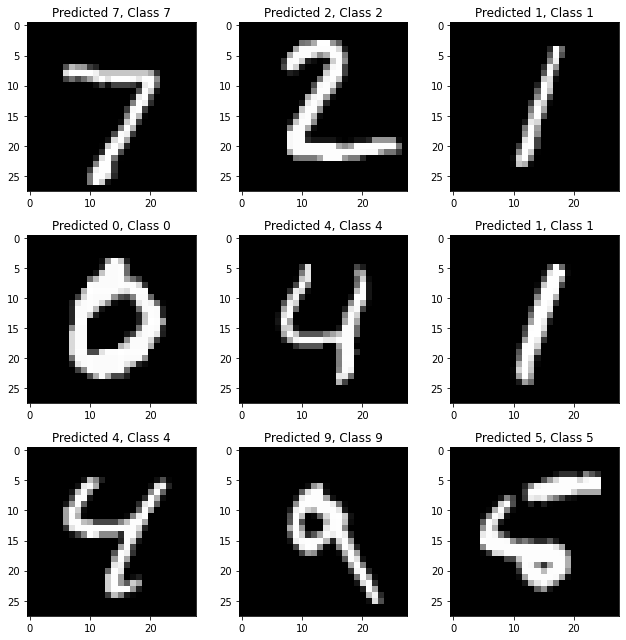

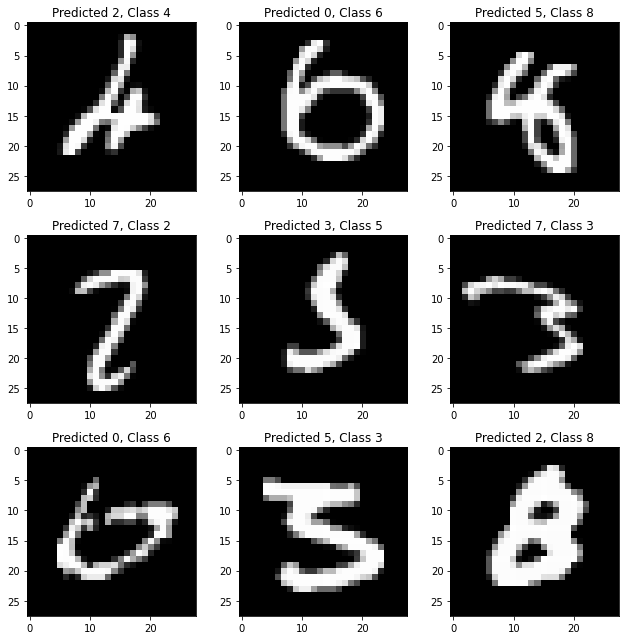

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, Class {}".format(predict_classes[correct], y_test[correct]))
    
plt.tight_layout()
plt.show();

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predict_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()
plt.show();

> How does increasing the batch size to 10,000 affect the training time and test accuracy?

* The models trained with **large batch sizes will drop the generalizing ability of the network on the validation set**.
* The **batch size of 10,000** will create a **very sharp loss landscape (sharp minimizers)**.




> How about a batch size of 32?

* The models trained with **small batch sizes generalize well on the validation set**. 
* The **batch size of 32** gives us the best result which consistently converge to **flatter landscapes (flat minimizers)**

---

**Gradient descent-based optimization makes linear approximation to the cost function. However if the cost function is highly non-linear (highly curved) then the approximation will not be very good, hence small batch sizes are safe**.

---



# Building a "Deep" Convolutional Neural Network (CNN)

## Introducing Convolution!
Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. curvature, edges) of each image into a network, and have the network learn which features are important for classifying an image?

This possible through convolution! Convolution applies kernels (filters) that traverse through each image and generate feature maps.

If the image is a 5 x 5 matrix and the kernel going over it is a 3 x 3 matrix. A dot product operation takes place between the image and the kernel and the convolved feature is generated. Each kernel in a CNN learns a different characteristic of an image.

Kernels are often used in photoediting software to apply blurring, edge detection, sharpening, etc.

Kernels in deep learning networks are used in similar ways, i.e. highlighting some feature. Combined with a system called max pooling, the non-highlighted elements are discarded from each feature map, leaving only the features of interest, reducing the number of learned parameters, and decreasing the computational cost (e.g. system memory).

We can also take convolutions of convolutions -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.

*Warning: What you may find down there in those deep convolutions may not appear recognizable to you.*

In [ ]:
# import some additional tools

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


 We build our network without flattening to a 784-length vector. Instead, performing as 28 x 28 matrices with additional dimension 1 to represent the single channel because of gray scale images.

In [ ]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


## One-hot encoding

The step follows the same as per the first model.

In [ ]:
# one-hot format classes

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Model Building

The `Sequential` model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

In [ ]:
model_2 = Sequential()                                 # Linear stacking of layers

## The First convolution layer

`Conv2D` is a **2D Convolution Layer**, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

> **Kernel (Filter/Feature Detector):** In image processing kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image.

Let's explore the parameters of the Conv2D which has the following arguments:

* `Filters = 32` is the learning of a total of 32 filters that the convolution layers will learn from (determines the number of output filters in the convolution).

* `kernel_size = (3, 3)` which determines the dimensions of the kernel. It specifies the height and width of the 2D convolution window. This parameter must be an odd integer.

* `input_shape=(28,28,1)` is passed as we created.

In [ ]:
# Convolution Layer 1
model_2.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps # 1 - is a channel

`BatchNormalization` allows each layer of a network to learn by itself a little bit more independently of other layers. It adds two trainable parameters to each layer, so the normalized output is multiplied by a "standard deviation" parameter (gamma) and add a "mean" parameter (beta).

Batch Normalization reduces overfitting because it has a slight regularization effects. Similar to dropout, it adds some noise to each hidden layer's activations. Therefore, if we use batch normalizaion, we will use less dropout, which is a good thing because we are not going to lose a lot of information. However, we should not depend only on batch normalizaion for regularization; we should better use it together with dropout.

* Makes weights easier to initialize
* Makes more activation functions viable
* Simplifies the creation of deeper networks.

**This Layer that normalizes its inputs.** Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

> Initialize the model along with the input shape to be and the channels dimension itself. That is here, `input_shape = (28, 28, 1)` - the width, height and depth parameters that affects the volume shape. For single channel is specified which is set as `axis = -1`, the depth which is taken into BatchNormalization.

In [ ]:
model_2.add(BatchNormalization(axis=-1))               # normalize each feature map before activation

`Relu`activation function is added into this layer.

In [ ]:
convLayer01 = Activation('relu')                     # activation

In [ ]:
model_2.add(convLayer01)

## The Second convolution layer

`Conv2D` layer of **32 filters** and **3 x 3 kernel size** is used in this second convolution layer.

In [ ]:
# Convolution Layer 2
model_2.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps

Batch Normalizing of the filters before activation function

In [ ]:
model_2.add(BatchNormalization(axis=-1))               # normalize each feature map before activation

`Relu` activation function is used in this layer.

In [ ]:
model_2.add(Activation('relu'))                        # activation

Using `MaxPooling2D` to reduce the spatial dimensions (height and width) of the output volume by taking the maximum value over an input window of `pool_size = 2 x 2`, with default `strides = None`.

In [ ]:
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel

In [ ]:
model_2.add(convLayer02)

## The third convolution layer

Proceeding with same procedure by adding:
* `Conv2D` layer of **64 filters** and **3 x 3 kernel size** is used in this third convolution layer.

* `BatchNormalization` performance on each feature map
* `Relu` activation function is used in this layer.

In [ ]:
# Convolution Layer 3
model_2.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model_2.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model_2.add(convLayer03)

## The fourth convolution layer

Proceeding with same procedure by adding:
* `Conv2D` layer of **64 filters** and **3 x 3 kernel size** is used in this third convolution layer.

* `BatchNormalization` performance on each feature map
* `Relu` activation function is used in this layer.
* `MaxPooling2D` over the `pool_size` as **2 x 2**

* `Flatten` the 2D matrix of this maxpooled layer as `4 x 4 x 64` which arises to 1024 vector length

In [ ]:
# Convolution Layer 4
model_2.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model_2.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model_2.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model_2.add(convLayer04)
model_2.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

## Fully connected 5th layer

Performing the same process of dense layer and others.


In [ ]:
# Fully Connected Layer 5
model_2.add(Dense(512))                                # 512 FCN nodes
model_2.add(BatchNormalization())                      # normalization
model_2.add(Activation('relu'))                        # activation

## Fully connected 6th layer

Performing the same process as per final output layer in the first model (`model_1`)



In [ ]:
# Fully Connected Layer 6                       
model_2.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model_2.add(Dense(10))                                 # final 10 FCN nodes
model_2.add(Activation('softmax'))                     # softmax activation

## Summary of the CNN Model

## **Question:** Here, in this code cell, I am aware of how trainable params occurs and how it's calculated. 
## Non-trainable params occurs after adding Batch Normalization layer. Under What basis this parameters occur? How this is calculated? 

In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_12 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_13 (Activation)  (None, 24, 24, 32)       

Here, the parameters are calculated in the following way:

**Output size=((input size−kernel size)+2*padding)/stridecount)+1**

## Compiling the second model

In [ ]:
# we'll use the same optimizer

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [ ]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size

# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

model_2.fit_generator(train_generator, steps_per_epoch=60000//128, 
                    epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


468/468 [==============================] - 216s 459ms/step - loss: 0.1297 - accuracy: 0.9602 - val_loss: 0.1027 - val_accuracy: 0.9655
Epoch 2/5
468/468 [==============================] - 213s 456ms/step - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.0351 - val_accuracy: 0.9895
Epoch 3/5
468/468 [==============================] - 198s 423ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.0334 - val_accuracy: 0.9891
Epoch 4/5
468/468 [==============================] - 208s 444ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0295 - val_accuracy: 0.9905
Epoch 5/5
468/468 [==============================] - 221s 472ms/step - loss: 0.0309 - accuracy: 0.9907 - val_loss: 0.0178 - val_accuracy: 0.9936


## Evaluate Model's Accuracy on Test Data



In [ ]:
score = model_2.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 9s 29ms/step - loss: 0.0178 - accuracy: 0.9936
Test score: 0.01778857782483101
Test accuracy: 0.9936000108718872


## Inspecting the Output

In [ ]:
# The predict_classes function 
# according to the trained classifier for each input example
predict_x = model_2.predict(X_test)
predict_classes = np.argmax(predict_x, axis = 1)

# Check with items we got right / wrong
correct_indices = np.nonzero(predict_classes == y_test)[0]

incorrect_indices = np.nonzero(predict_classes != y_test)[0]

313/313 [==============================] - 12s 39ms/step


In [ ]:
correct_indices

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [ ]:
incorrect_indices

array([ 115,  193,  449,  583,  659,  674,  716,  717,  726,  938,  947,
       1014, 1232, 1247, 1438, 1459, 1621, 1790, 1878, 1901, 2018, 2035,
       2130, 2280, 2326, 2329, 2414, 2654, 2771, 3023, 3062, 3073, 3225,
       3266, 3600, 3808, 4065, 4163, 4176, 4443, 4507, 4699, 4879, 4943,
       5165, 5955, 6101, 6532, 6558, 6576, 6597, 6625, 7216, 7354, 7565,
       7856, 7928, 8325, 8376, 8382, 9664, 9679, 9692, 9729])

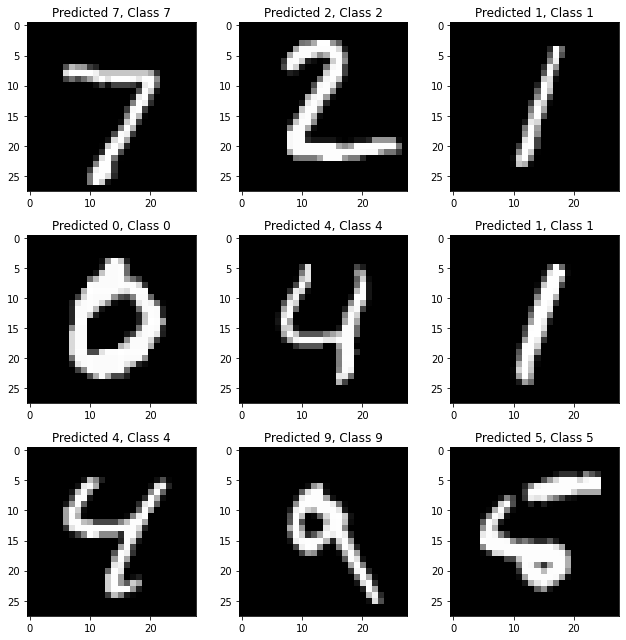

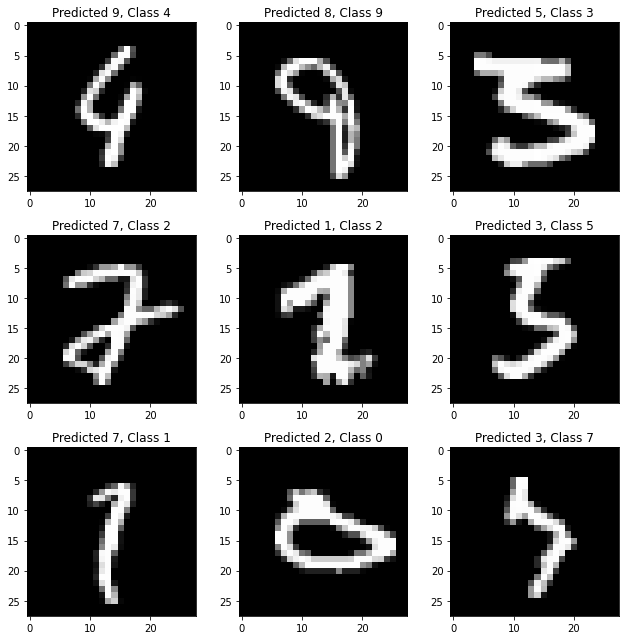

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, Class {}".format(predict_classes[correct], y_test[correct]))
    
plt.tight_layout()
plt.show();

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predict_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()
plt.show();